<a href="https://colab.research.google.com/github/Amish-mavani/coursework/blob/main/Semantic_Analysis_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

data = pd.read_csv(r"amazon_alexa.tsv", delimiter = '\t', quoting = 3)

print(f"Dataset shape : {data.shape}")

Dataset shape : (3150, 5)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data.head()


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
data.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",1
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",1
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",1
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali...",1
3149,4,29-Jul-18,Black Dot,Good,1


In [ ]:
print(f"Feature names : {data.columns.values}")

data.isnull().sum()


data[data['verified_reviews'].isna() == True]

data.dropna(inplace=True)

print(f"Dataset shape after dropping null values : {data.shape}")

data['length'] = data['verified_reviews'].apply(len)

data.head()

data.dtypes

Feature names : ['rating' 'date' 'variation' 'verified_reviews' 'feedback']
Dataset shape after dropping null values : (3149, 5)


,0
rating,int64
date,object
variation,object
verified_reviews,object
feedback,int64
length,int64


In [ ]:
data['date'].value_counts()

,count
date,
30-Jul-18,1603
29-Jul-18,482
28-Jul-18,250
26-Jul-18,85
31-Jul-18,81
...,...
1-Jun-18,2
9-Jun-18,1
13-Jun-18,1


Rating value count: 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


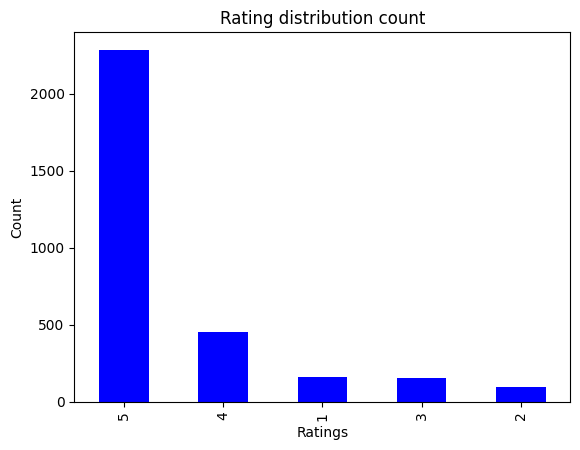


Rating value count - percentage distribution: 
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


In [ ]:
print(f"Rating value count: \n{data['rating'].value_counts()}")

data['rating'].value_counts().plot.bar(color = 'blue')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

print(f"\nRating value count - percentage distribution: \n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")

Feedback value count: 
feedback
1    2893
0     256
Name: count, dtype: int64
Sound is terrible if u want good music too get a bose
Loved it!


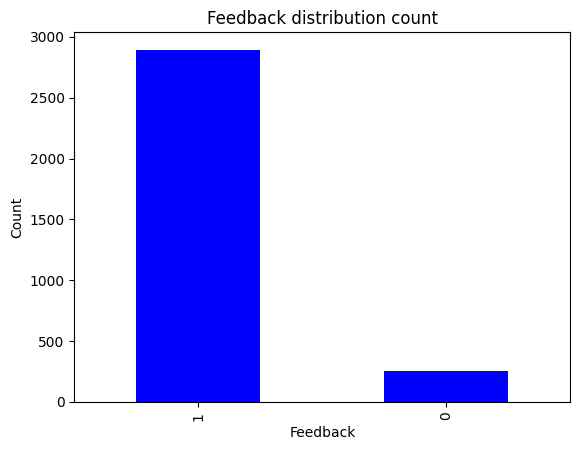

Feedback value count - percentage distribution: 
feedback
1    91.87
0     8.13
Name: count, dtype: float64


In [ ]:

print(f"Feedback value count: \n{data['feedback'].value_counts()}")
review_0 = data[data['feedback'] == 0].iloc[1]['verified_reviews']
print(review_0)

review_1 = data[data['feedback'] == 1].iloc[1]['verified_reviews']
print(review_1)

data['feedback'].value_counts().plot.bar(color = 'blue')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()
print(f"Feedback value count - percentage distribution: \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

Variation value count: 
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


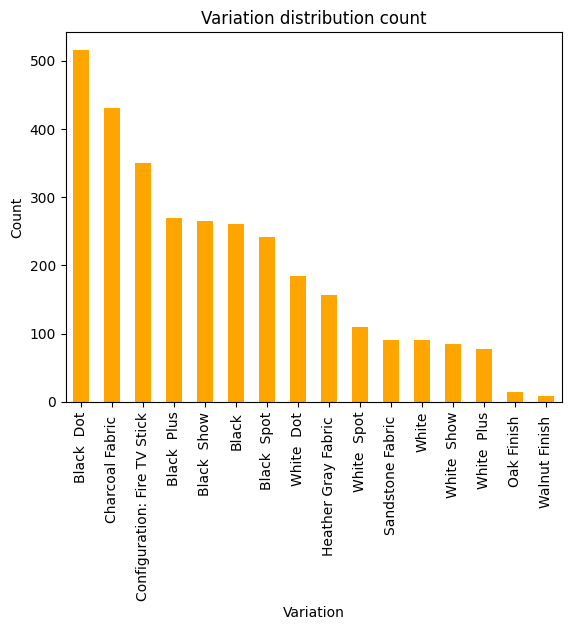

Variation value count - percentage distribution: 
variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


,rating
variation,
Black,4.233716
Black Dot,4.453488
Black Plus,4.370370
Black Show,4.490566
Black Spot,4.311203
Charcoal Fabric,4.730233
Configuration: Fire TV Stick,4.591429
Heather Gray Fabric,4.694268
Oak Finish,4.857143


In [ ]:

data[data['feedback'] == 0]['rating'].value_counts()
data[data['feedback'] == 1]['rating'].value_counts()


print(f"Variation value count: \n{data['variation'].value_counts()}")


data['variation'].value_counts().plot.bar(color = 'orange')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

print(f"Variation value count - percentage distribution: \n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")

data.groupby('variation')['rating'].mean()

In [ ]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


[Text(0.5, 1.0, 'Distribution of length of review ')]

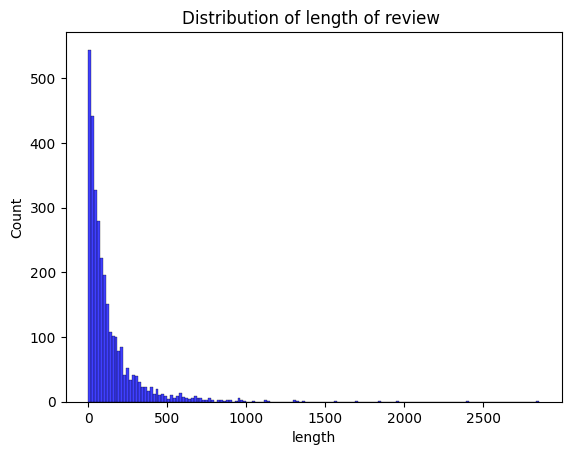

In [ ]:
sns.histplot(data['length'],color='blue').set(title='Distribution of length of review ')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

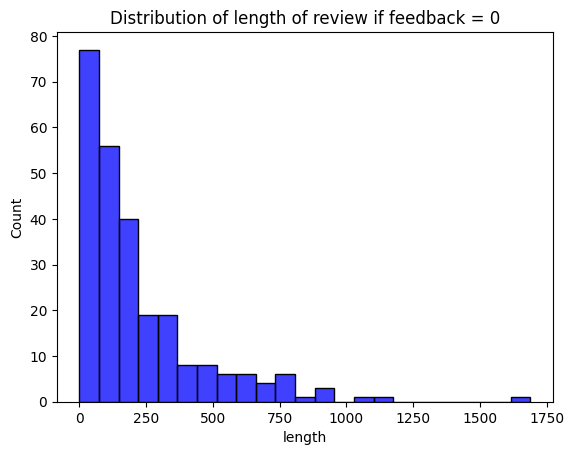

In [ ]:
sns.histplot(data[data['feedback']==0]['length'],color='blue').set(title='Distribution of length of review if feedback = 0')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

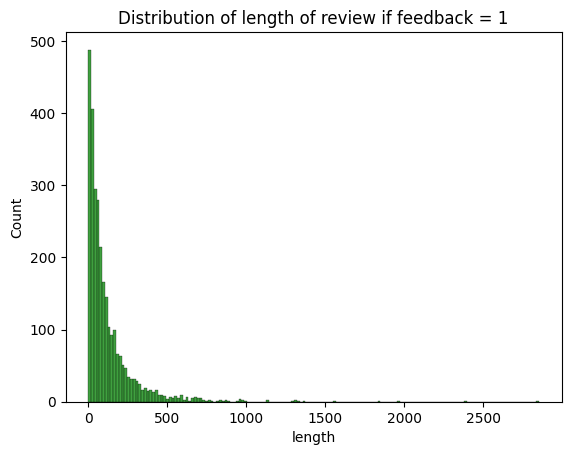

In [ ]:
sns.histplot(data[data['feedback']==1]['length'],color='green').set(title='Distribution of length of review if feedback = 1')

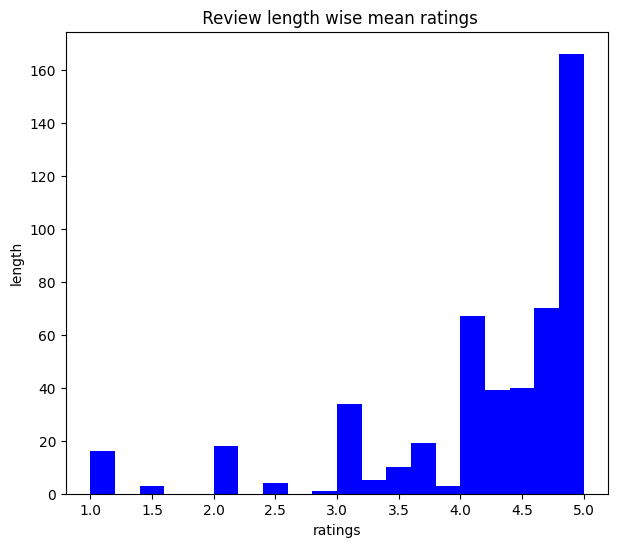

In [ ]:
data.groupby('length')['rating'].mean().plot.hist(color = 'blue', figsize=(7, 6), bins = 20)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 25')

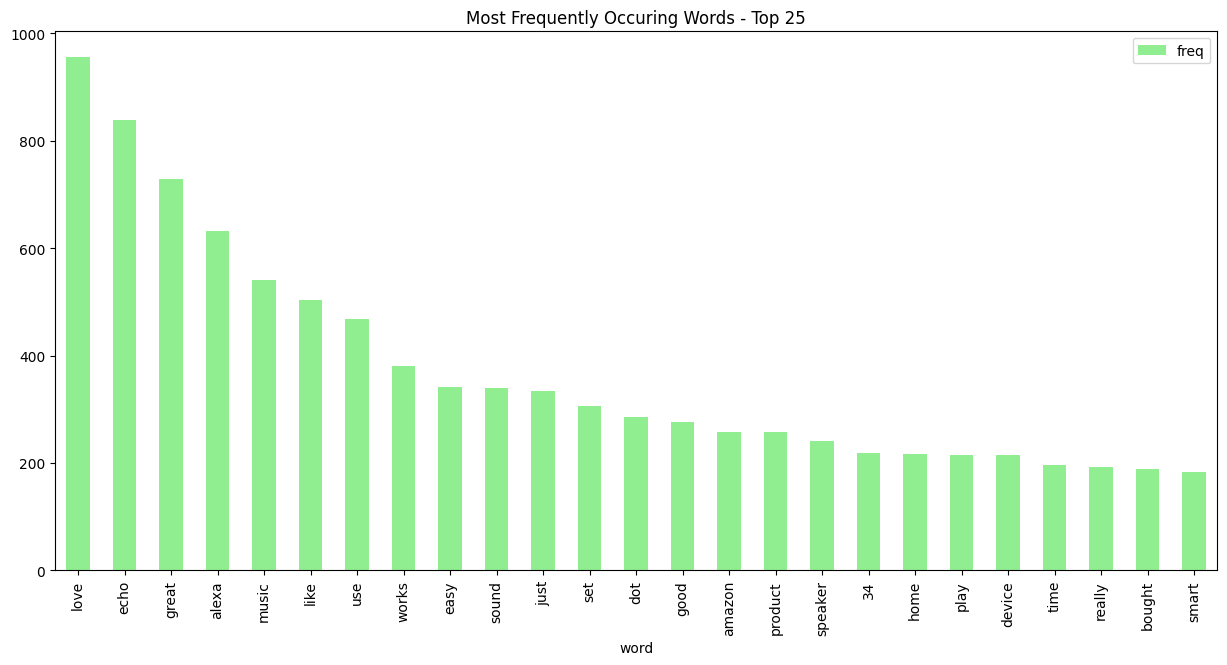

In [ ]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.verified_reviews)

words = cv.fit_transform(data.verified_reviews)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(25).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'lightgreen')
plt.title("Most Frequently Occuring Words - Top 25")


[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
X shape: (3149, 2500)
y shape: (3149,)
X train: (2204, 2500)
y train: (2204,)
X test: (945, 2500)
y test: (945,)
X train max value: 12
X test max value: 10
Training Accuracy : 0.9945553539019963
Testing Accuracy : 0.9407407407407408


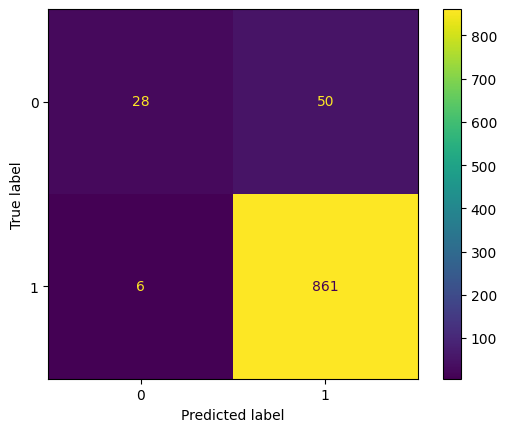

Accuracy : 0.9328527354997943
Standard Variance : 0.008540383388897297


In [ ]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

# creating bag of words
cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

print(y)
print(data.iloc[:, 4].values)

pickle.dump(cv, open('countVectorizer.pkl', 'wb'))

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

pickle.dump(scaler, open('scaler.pkl', 'wb'))

model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

y_preds = model_rf.predict(X_test_scl)

cm = confusion_matrix(y_test, y_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

accuracies = cross_val_score(estimator = model_rf, X = X_train_scl, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Best Parameter Combination : {'bootstrap': True, 'max_depth': 80, 'min_samples_split': 8, 'n_estimators': 100}
Cross validation mean accuracy on train set : 96.68216878402905
Cross validation mean accuracy on test set : 92.16197822141561
Accuracy score for test set : 0.9407407407407408

Training Accuracy : 0.971415607985481
Testing Accuracy : 0.9417989417989417


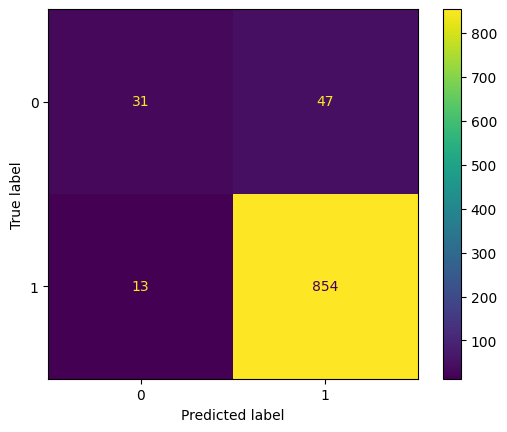

In [ ]:

params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

cv_object = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(X_train_scl, y_train.ravel())

#Getting the best parameters from the grid search
print("Best Parameter Combination : {}".format(grid_search.best_params_))
print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test, y_preds))

#XGboost

model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

print("\nTraining Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))

y_preds = model_xgb.predict(X_test)
cm = confusion_matrix(y_test, y_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

pickle.dump(model_xgb, open('model_xgb.pkl', 'wb'))


Training Accuracy : 0.9945553539019963
Testing Accuracy : 0.9227513227513228


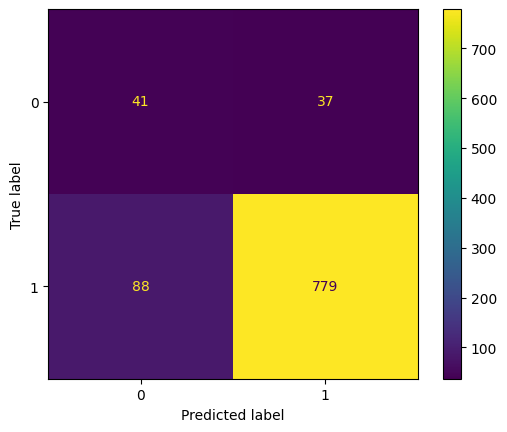

In [ ]:
#Decision Tree Classifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)

print("Training Accuracy :", model_dt.score(X_train_scl, y_train))
print("Testing Accuracy :", model_dt.score(X_test_scl, y_test))

y_preds = model_dt.predict(X_test)
cm = confusion_matrix(y_test, y_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()


In [ ]:
import re
import nltk
from io import BytesIO
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import pandas as pd
import pickle
nltk.download("stopwords")
STOPWORDS = set(stopwords.words("english"))

EXCEPTION_WORDS = {"hate"}

def handle_exceptions(text):
    for word in EXCEPTION_WORDS:
        if word in text.lower():
            return "Negative"
    return None

def single_prediction(predictor, scaler, cv, text_input):
    stemmer = PorterStemmer()
    review = re.sub("[^a-zA-Z]", " ", text_input)
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if word not in STOPWORDS]
    review = " ".join(review)
    exception_result = handle_exceptions(text_input)
    if exception_result:
        return exception_result

    X_prediction = cv.transform([review]).toarray()
    X_prediction_scl = scaler.transform(X_prediction)
    y_predictions = predictor.predict_proba(X_prediction_scl)
    y_predictions = y_predictions.argmax(axis=1)[0]
    y_predictions = "Positive" if y_predictions == 1 else "Negative"
    return y_predictions

def bulk_prediction(predictor, scaler, cv, data):
    corpus = []
    stemmer = PorterStemmer()
    for i in range(data.shape[0]):
        review = re.sub("[^a-zA-Z]", " ", data.iloc[i]["Sentence"])
        review = review.lower().split()
        review = [stemmer.stem(word) for word in review if word not in STOPWORDS]
        review = " ".join(review)
        exception_result = handle_exceptions(data.iloc[i]["Sentence"])
        if exception_result:
            data.at[i, "Predicted sentiment"] = exception_result
        else:
            corpus.append(review)

    if corpus:
        X_prediction = cv.transform(corpus).toarray()
        X_prediction_scl = scaler.transform(X_prediction)
        y_predictions = predictor.predict_proba(X_prediction_scl)
        y_predictions = y_predictions.argmax(axis=1)
        y_predictions = list(map(sentiment_mapping, y_predictions))
        data.loc[data["Predicted sentiment"].isnull(), "Predicted sentiment"] = y_predictions

    predictions_csv = BytesIO()
    data.to_csv(predictions_csv, index=False)
    predictions_csv.seek(0)
    return predictions_csv

def sentiment_mapping(x):
    return "Positive" if x == 1 else "Negative"

if __name__ == "__main__":
    predictor = pickle.load(open(r"model_xgb.pkl", "rb"))
    scaler = pickle.load(open(r"scaler.pkl", "rb"))
    cv = pickle.load(open(r"countVectorizer.pkl", "rb"))

    print("Sentiment Analysis Tool")
    print("1. Single Prediction")
    print("2. Bulk Prediction")
    choice = input("Select an option (1 or 2): ").strip()

    if choice == "1":
        text_input = input("Enter text to analyze sentiment: ").strip()
        if text_input:
            predicted_sentiment = single_prediction(predictor, scaler, cv, text_input)
            print(f"Predicted Sentiment: {predicted_sentiment}")
        else:
            print("No text entered. Please try again.")

    elif choice == "2":
        input_file_path = input("Enter the path to the input CSV file: ").strip()
        output_file_path = input("Enter the path to save the output CSV file: ").strip()
        try:
            data = pd.read_csv(input_file_path)
            result_csv = bulk_prediction(predictor, scaler, cv, data)
            with open(output_file_path, "wb") as f:
                f.write(result_csv.getbuffer())
            print(f"Predictions saved to {output_file_path}")
        except Exception as e:
            print(f"Error processing the file: {e}")
    else:
        print("Invalid option. Please choose 1 or 2.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sentiment Analysis Tool
1. Single Prediction
2. Bulk Prediction
Select an option (1 or 2): 1
Enter text to analyze sentiment: i hate it
Predicted Sentiment: Negative
